In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)

In [2]:
# Load the data
df = pd.read_csv('../data/BrentOilPrices.csv') 

# FIX: Use format='mixed' to handle different date styles automatically
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# Continue as before
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

print(df.head())
print(df.info())

            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB
None


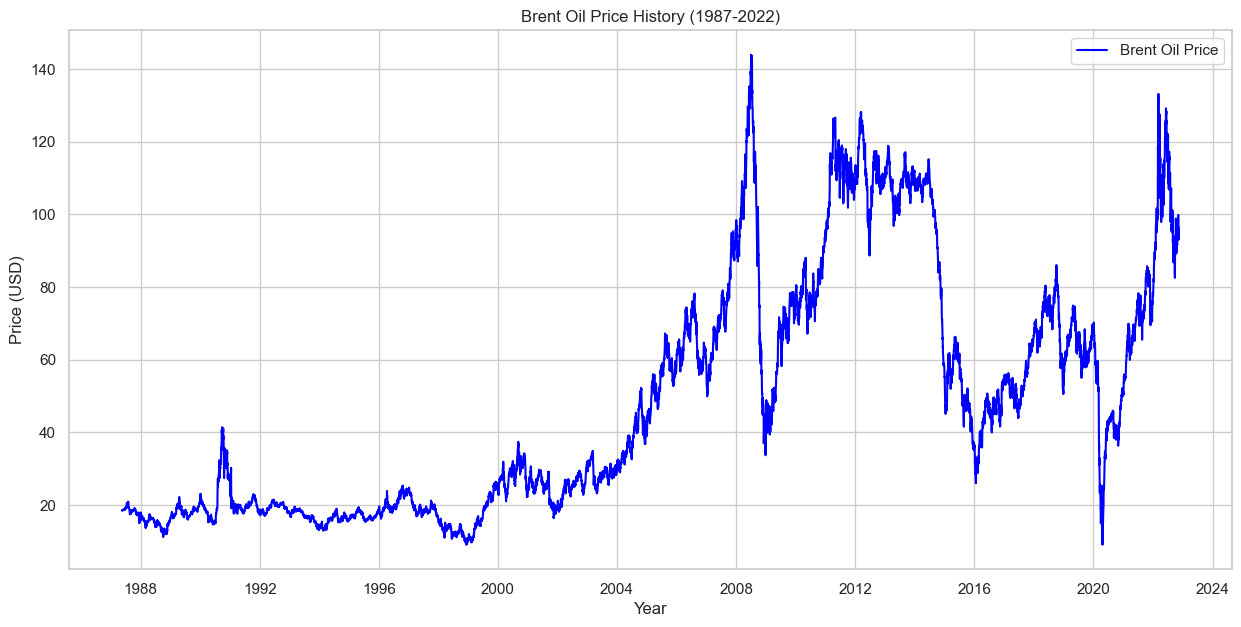

In [3]:
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Price History (1987-2022)')
plt.ylabel('Price (USD)')
plt.xlabel('Year')
plt.legend()
plt.show()

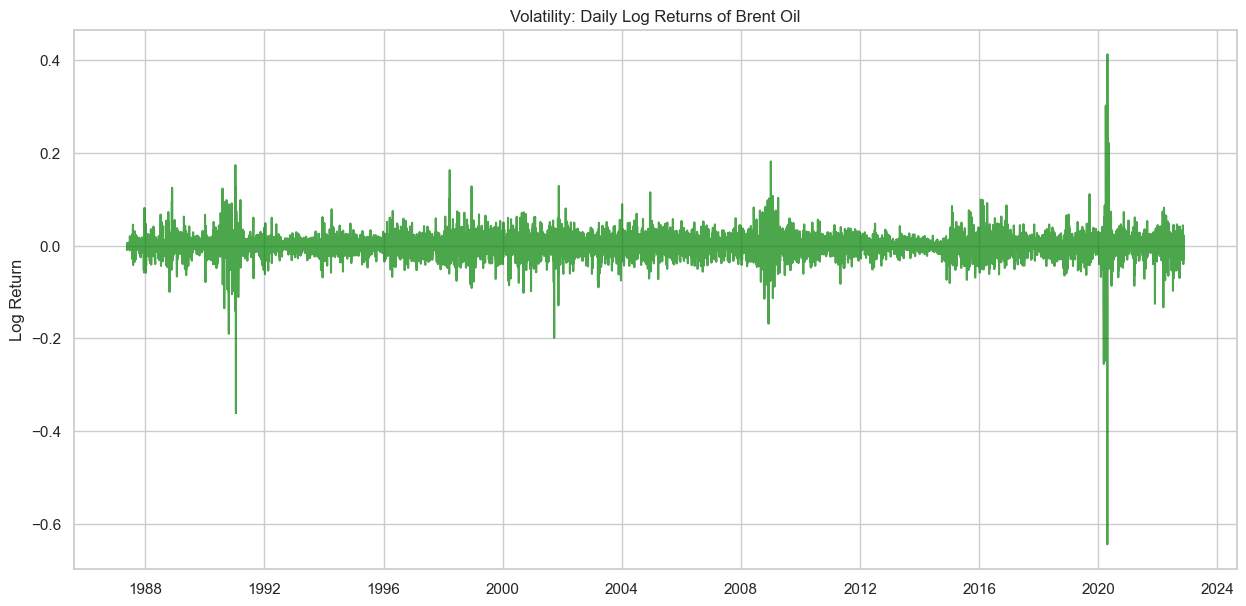

In [ ]:
# Calculate Log Returns (to check volatility)
df['Log_Return'] = np.log(df['Price'] / df['Price'].shift(1))

# Plot Log Returns
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['Log_Return'], label='Log Returns', color='green', alpha=0.7)
plt.title('Volatility: Daily Log Returns of Brent Oil')
plt.ylabel('Log Return')
plt.show()

# ADF Test (Augmented Dickey-Fuller)
result = adfuller(df['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("The time series is NOT stationary (it has a trend).")
else:
    print("The time series is stationary.")